# SEED-ROSET COUPLING 
## 12-01-2023

### Developed by: Md Shahabul Alam, Research Scientist, UA/AWI/CIROH
### Reviewed by: Ryan Johnson, AI Research Scientist, UA/AWI/CIROH

In [1]:
#Import the packages
import pandas as pd
import glob
import os
import numpy as np
import scipy.stats as scs
from scipy.stats import pearson3, skew, norm
import matplotlib.pyplot as plt 
from tqdm import tqdm
import warnings
import importlib
warnings.filterwarnings("ignore")

#set a datapath folder
os.chdir('../../..')
datapath = os.getcwd()
cwd = os.getcwd()

# EVENT class

In [2]:
from historical_events import flood_events
state_codes = ['OH']
merged_df, merged_site_id, merged_site_code = flood_events(state_codes, tqdm, datapath) 

Enter the event type as 'flood' or 'drought': flood


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Getting data for  OH
Loading files...
Loading data from files...



100%|████████████████████████████████████████████████████████████████████████████████| 171/171 [00:02<00:00, 78.28it/s]


Getting site ids...
Fixing applicable site codes...
Calculating flood values...
Getting flood events...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.84s/it]

Merged data saved as merged_flood_events.csv


# 
Set up ROSET for finding the USGS site IDs within a State or HUC 

Getting NWIS Streamstats
Getting NHD reaches


Categorical breaks for  Drainage_area_mi2 :  [3.86e-05, 153.0, 589.0, 1360.0, 3130.0, 7780.0]
Getting  NWM_v2.1  data


Site:  4652052  not in database, skipping
Site:  4779053  not in database, skipping
Site:  4782017  not in database, skipping
Site:  8111583  not in database, skipping
Site:  2600169  not in database, skipping


Site:  4673267  not in database, skipping
Site:  8125667  not in database, skipping
Site:  8140016  not in database, skipping


Site:  4684242  not in database, skipping
Site:  4697481  not in database, skipping
Site:  4709484  not in database, skipping
Site:  4708726  not in database, skipping


Site:  8975242  not in database, skipping
Site:  4741899  not in database, skipping
Site:  4583044  not in database, skipping


100% |########################################################################|


Site:  3823985  not in database, skipping
Site:  12997756  not in database, skipping
Site:  10926401  not in database, skipping
Getting NWIS data
USGS site  01481000  not in database, skipping


USGS site  01470755  not in database, skipping
USGS site  01471000  not in database, skipping
USGS site  01519200  not in database, skipping
USGS site  01534860  not in database, skipping
USGS site  01541000  not in database, skipping


USGS site  01543700  not in database, skipping
USGS site  01547200  not in database, skipping
USGS site  01556000  not in database, skipping
USGS site  01566000  not in database, skipping
USGS site  01571500  not in database, skipping


USGS site  01573000  not in database, skipping
USGS site  03015500  not in database, skipping
USGS site  03038000  not in database, skipping
USGS site  03047000  not in database, skipping
USGS site  03085500  not in database, skipping


100% |########################################################################|


USGS site  03102850  not in database, skipping
USGS site  03106000  not in database, skipping
Plotting monitoring station locations


,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs


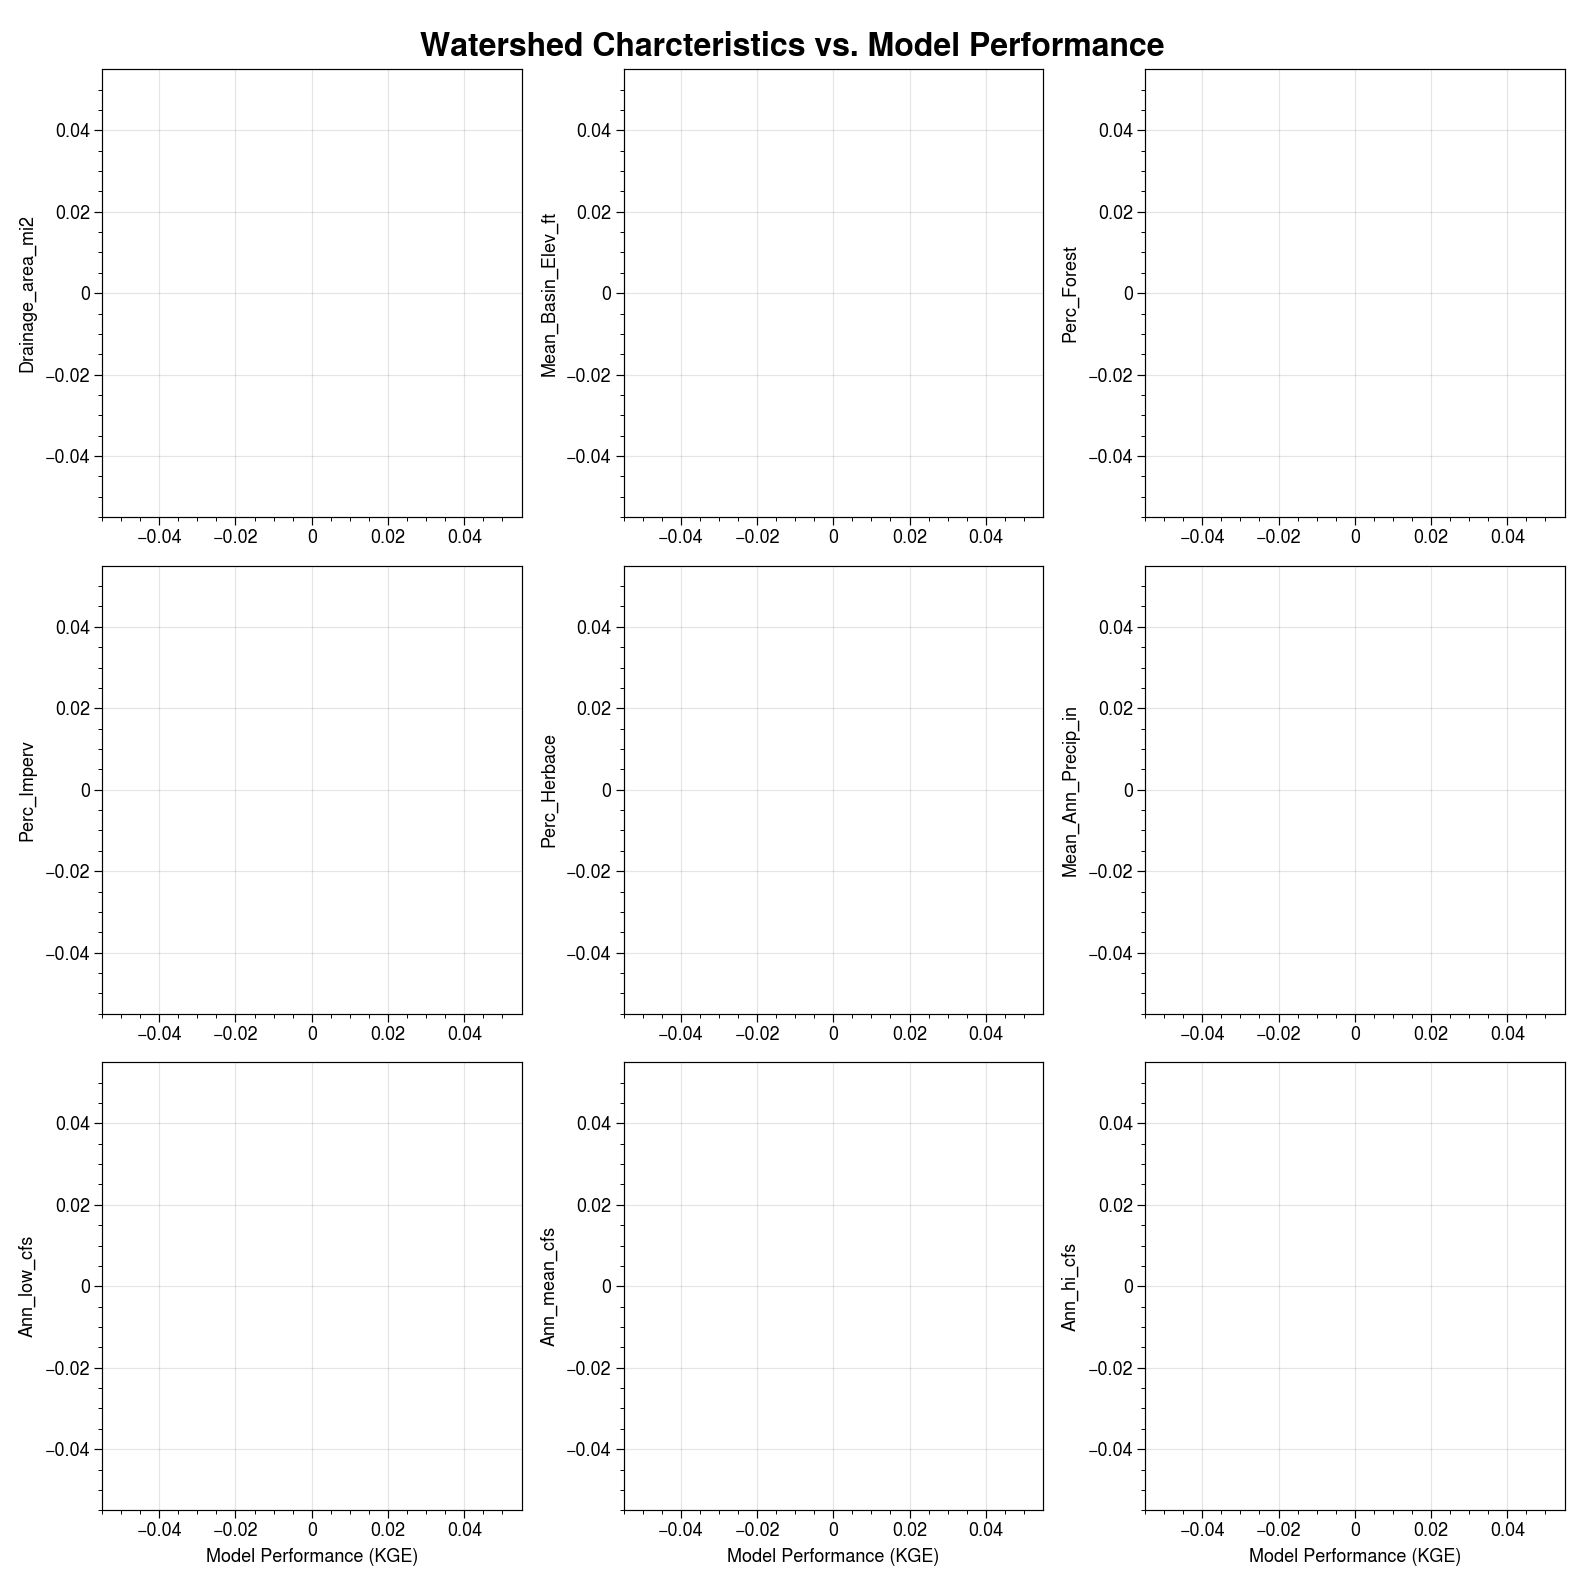

Getting geospatial information for HUC:  ['0506']
['0506']
Finding NWIS monitoring stations within  ['0506']  watershed boundary
Creating dataframe of NWIS stations within  ['0506']  watershed boundary
Getting collocated  NWM_v2.1  NHD reaches with NWIS monitoring locations


Getting  NWM_v2.1  data


Site:  5215647  not in database, skipping


Site:  5218167  not in database, skipping


Site:  5217115  not in database, skipping
Site:  5217005  not in database, skipping
Site:  5217811  not in database, skipping


Site:  5231986  not in database, skipping


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


Plotting monitoring station locations


,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs,name,huc4
0,03223425,5210827,Whetstone Creek at Mt Gilead OH,43,310,83.373148,0.796694,37.800000,0.0,28.90,0.99,0.0,0.0,27.9,46.0,84.0,Scioto,0506
1,03234500,3486931,Scioto River at Higby OH,3835,20140,58.333450,0.755888,0.000348,0.0,22.20,3.00,0.0,0.0,2791.0,5570.0,10230.0,Scioto,0506
2,03237020,3488041,Scioto River at Piketon OH,4594,24425,54.611594,0.749226,0.000000,0.0,0.00,0.00,0.0,0.0,4152.0,7155.0,11920.0,Scioto,0506
3,03234000,5233256,Paint Creek near Bourneville OH,1059,5163,59.054765,0.643597,0.000000,0.0,0.00,0.00,0.0,0.0,326.1,961.0,1798.0,Scioto,0506
4,03231500,3486865,Scioto River at Chillicothe OH,3626,19719,70.792788,0.635270,0.000348,0.0,0.00,2.11,0.0,0.0,2360.0,4285.0,8005.0,Scioto,0506
5,03230700,3483129,Scioto River at Circleville OH,2947,14479,88.182824,0.628467,3220.000000,0.0,12.90,6.61,0.0,0.0,2267.0,3481.0,5338.0,Scioto,0506
6,03230800,3483935,Deer Creek at Mount Sterling OH,349,3138,39.470632,0.514627,0.130000,0.0,1.40,5.35,0.0,0.0,133.2,258.0,462.6,Scioto,0506
7,03228750,5212897,Alum Creek near Kilbourne OH,182,1348,58.114782,0.498553,64.900000,0.0,22.40,1.13,0.0,0.0,41.8,79.0,122.9,Scioto,0506
8,03217500,5211691,Scioto River at La Rue OH,650,4278,208.801013,0.358202,258.000000,0.0,7.29,1.23,0.0,0.0,157.6,307.0,593.0,Scioto,0506
9,03226800,5215055,Olentangy River near Worthington OH,903,4170,212.262312,0.350624,0.000039,0.0,0.00,1.00,0.0,0.0,280.9,568.0,1108.0,Scioto,0506


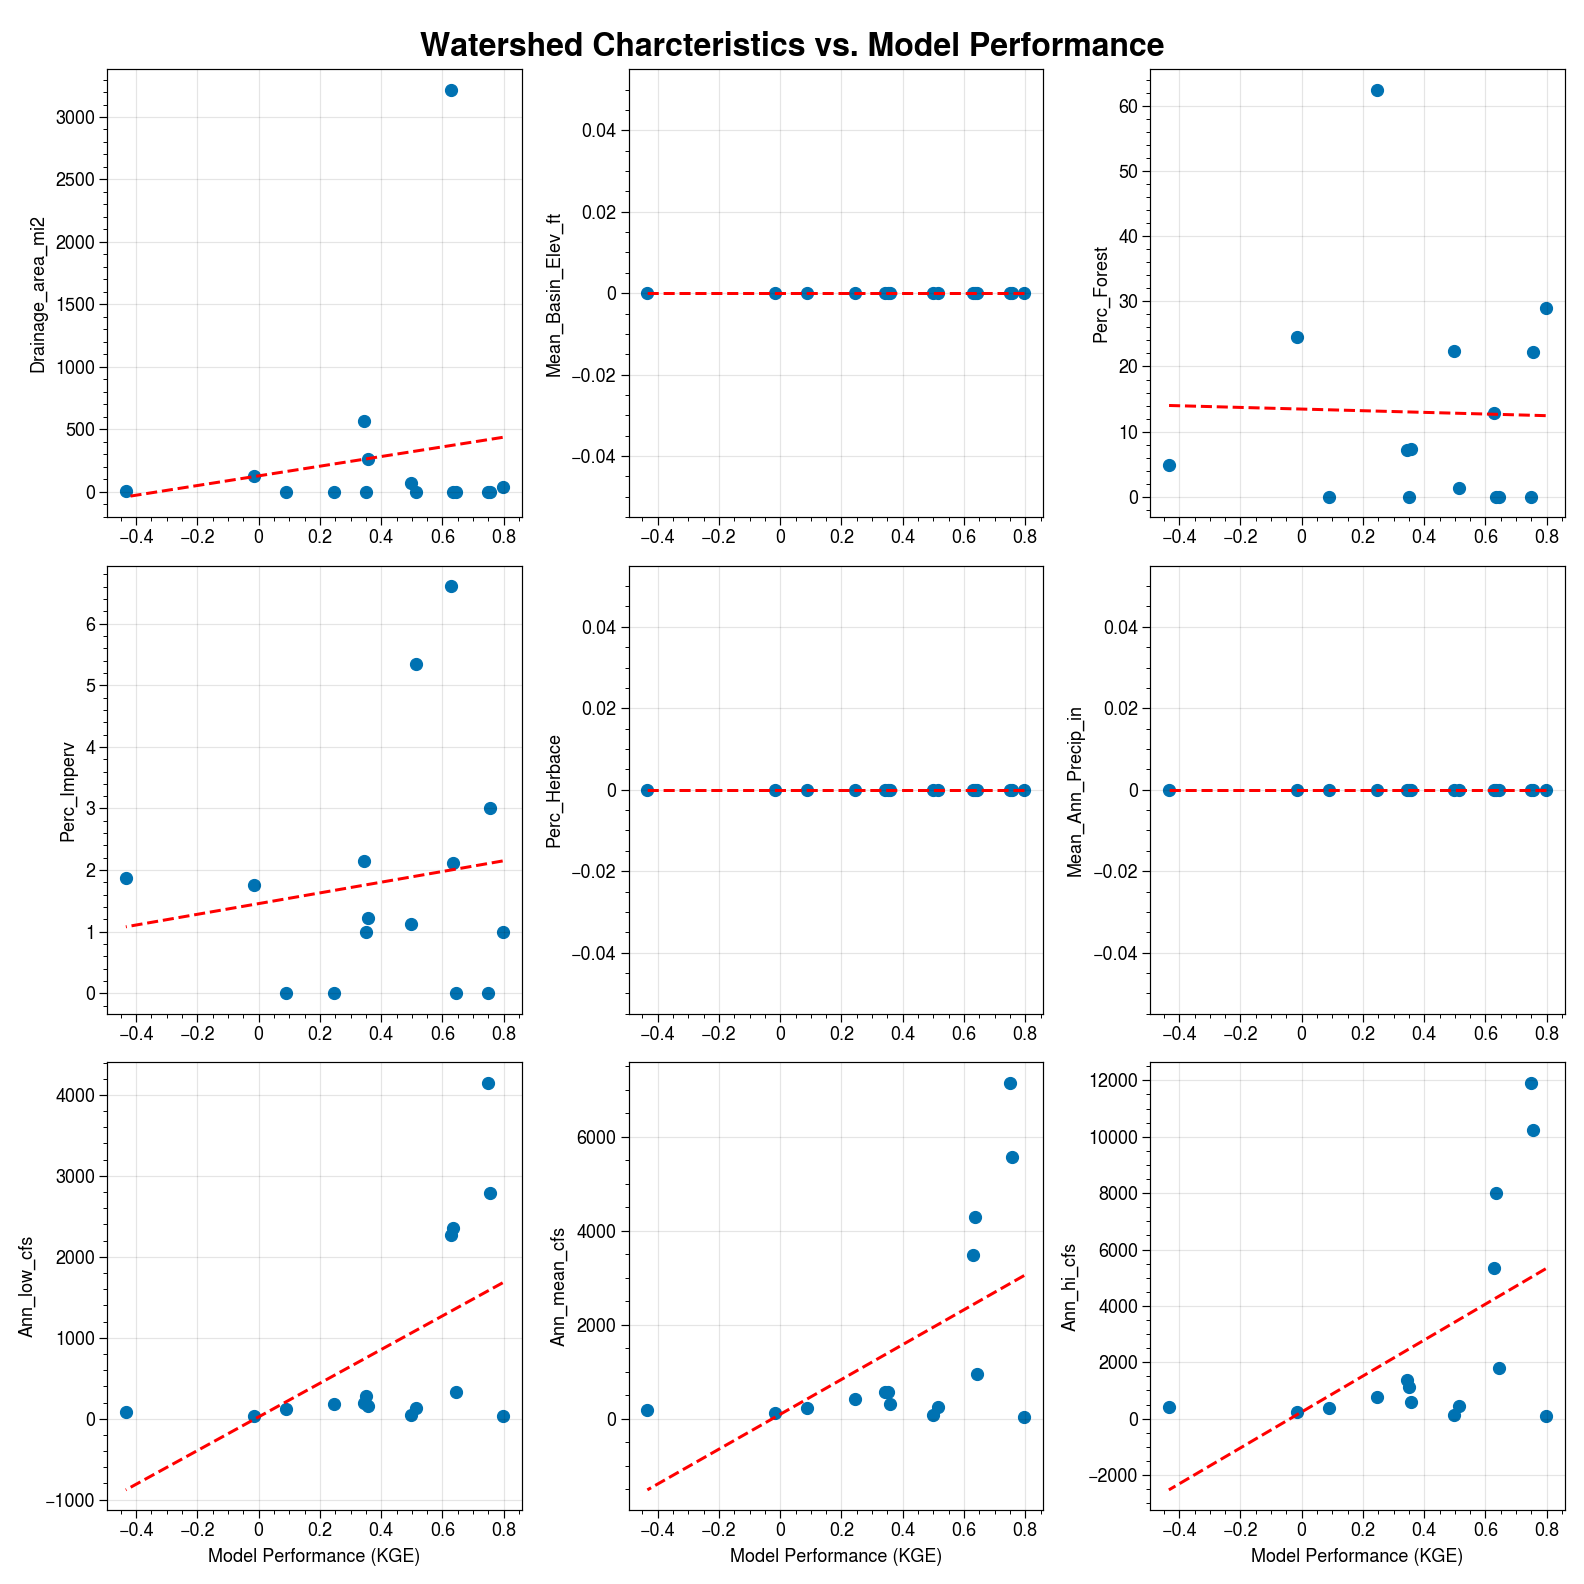

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_03223425                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_5210827 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

In [3]:
#Setup ROSET for the integration to SEED-based flood or drought events
from ROSET_init import roset_setup
state = 'PA'
classification = 'Drainage_area_mi2'
HUCids = ['0506']
lulc_usgs_ids, huc_usgs_ids = roset_setup(state, classification, HUCids)

# 
Run a few commands in the following cells to get your SEED ready

# 
Select USGS site IDs for the user's analysis level: State or HUC

In [ ]:
# import the analysis_tool module
import remove_leading_zero

# Define your target_ids, analysis_level, or any other required data
analysis_level = input("Enter 'lulc' or 'huc' for analysis level: ")

# Depending on the user's choice, select the appropriate list
if analysis_level == 'lulc':
    target_ids = lulc_usgs_ids
elif analysis_level == 'huc':
    target_ids = huc_usgs_ids   

# Call the perform_analysis function
updated_target_ids = remove_leading_zero.perform_analysis(analysis_level, target_ids)

target_usgs_ids = target_ids
target_usgs_ids

# 
Fit Log Pearson Type III (LP3) distribution to the historical events for the selected USGS site IDs

In [ ]:
from lp3_flood import fitted_values

lp3_values = fitted_values(datapath, updated_target_ids, analysis_level)
lp3_values

## 
Getting SEED output to conduct SEED-based model evaluation using Research-Oriented Streamflow Evaluation Tool (ROSET)

In [ ]:
from SEED_to_ROSET import seed_output

modified_results = seed_output(datapath, analysis_level, merged_site_id, merged_site_code, target_usgs_ids)

# SEED and ROSET integration

This section of code allows the user to evaluate modeled streamflow with selected NWIS monitoring sites of interest. 
The user can input multiple USGS sites (e.g., ['02378780', '02339495', '02342500'])
Please enter a start date, end date, and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent.

![REach_Eval_top](https://user-images.githubusercontent.com/33735397/206324095-dcc59508-bf4c-43a8-9a19-4fc5c573e205.PNG)

# 
Run Reach Class of ROSET to evaluate model performance for the USGS sites located in the HUCs

In [ ]:
import SEED_Reach
model = 'NWM_v2.1'

#initiate model
SEED = SEED_Reach.Reach_Eval(model , modified_results, cwd)

#get streamstats
SEED.get_NHD_Model_info()

#get data
SEED.prepare_comparison()


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
#plot data on map
freq = 'D'
SEED.Map_Plot_Eval(freq, supply = False)

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
SEED.Interactive_Model_Eval(freq,  supply = False)

# Rename the Eval_map.html and result_reach.csv after each run, otherwise these files will be overwritten 